In [2]:
V = 4

def print_solution(color):
	print("Solution Exists: Following are the assigned colors")
	print(" ".join(map(str, color)))

def is_safe(v, graph, color, c):
	# Check if the color 'c' is safe for the vertex 'v'
	for i in range(V):
		if graph[v][i] and c == color[i]:
			return False
	return True

def graph_coloring_util(graph, m, color, v):
	# Base case: If all vertices are assigned a color, return true
	if v == V:
		return True

	# Try different colors for the current vertex 'v'
	for c in range(1, m + 1):
		# Check if assignment of color 'c' to 'v' is fine
		if is_safe(v, graph, color, c):
			color[v] = c

			# Recur to assign colors to the rest of the vertices
			if graph_coloring_util(graph, m, color, v + 1):
				return True

			# If assigning color 'c' doesn't lead to a solution, remove it
			color[v] = 0

	# If no color can be assigned to this vertex, return false
	return False

def graph_coloring(graph, m):
	color = [0] * V

	# Call graph_coloring_util() for vertex 0
	if not graph_coloring_util(graph, m, color, 0):
		print("Solution does not exist")
		return False

	# Print the solution
	print_solution(color)
	return True

# Driver code
if __name__ == "__main__":
	graph = [
		[0, 1, 1, 1],
		[1, 0, 1, 0],
		[1, 1, 0, 1],
		[1, 0, 1, 0],
	]

	m = 3

	# Function call
	graph_coloring(graph, m)




Solution Exists: Following are the assigned colors
1 2 3 2


Sample Input 1:
Graph: [[0, 1, 1, 1], [1, 0, 1, 0], [1, 1, 0, 1], [1, 0, 1, 0]]
Number of Colors: 3
Output:
Solution Exists: Following are the assigned colors
1 2 3 2



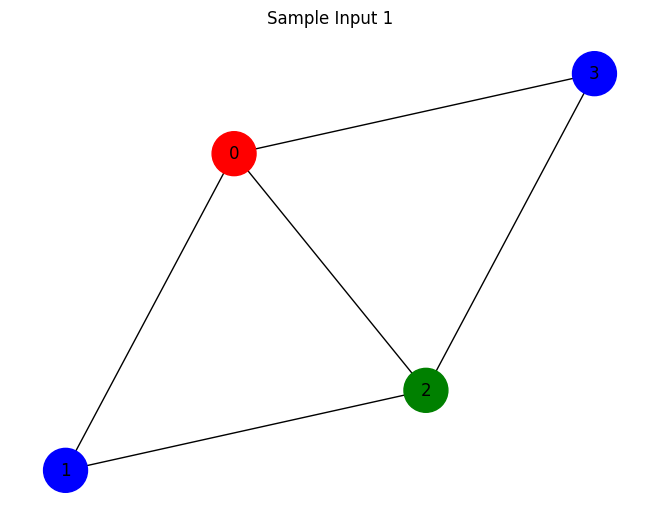

Sample Input 2:
Graph: [[0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0]]
Number of Colors: 2
Output:
Solution Exists: Following are the assigned colors
1 2 1 2



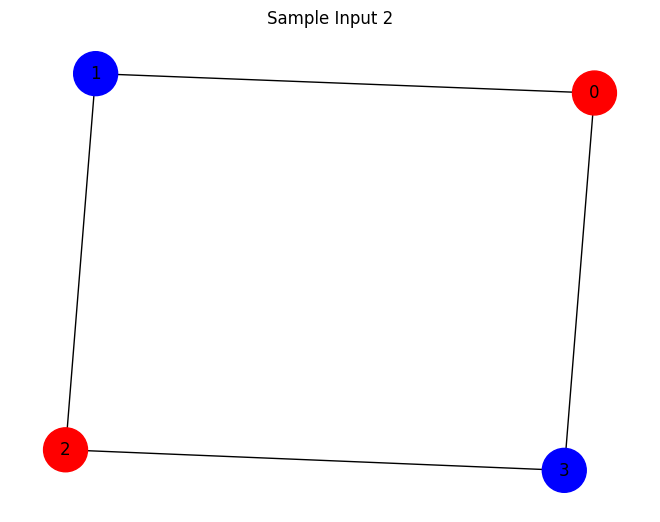

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def print_solution(color):
    print("Solution Exists: Following are the assigned colors")
    print(" ".join(map(str, color)))

def is_safe(v, graph, color, c):
    # Check if the color 'c' is safe for the vertex 'v'
    for i in range(len(graph)):
        if graph[v][i] and c == color[i]:
            return False
    return True

def graph_coloring_util(graph, m, color, v):
    # Base case: If all vertices are assigned a color, return true
    if v == len(graph):
        return True

    # Try different colors for the current vertex 'v'
    for c in range(1, m + 1):
        # Check if assignment of color 'c' to 'v' is fine
        if is_safe(v, graph, color, c):
            color[v] = c

            # Recur to assign colors to the rest of the vertices
            if graph_coloring_util(graph, m, color, v + 1):
                return True

            # If assigning color 'c' doesn't lead to a solution, remove it
            color[v] = 0

    # If no color can be assigned to this vertex, return false
    return False

def graph_coloring(graph, m):
    color = [0] * len(graph)

    # Call graph_coloring_util() for vertex 0
    if not graph_coloring_util(graph, m, color, 0):
        print("Solution does not exist")
        return False

    # Print the solution
    print_solution(color)
    return color  # Return the color array

# Sample Inputs and Outputs
graphs = [
    [
        [0, 1, 1, 1],
        [1, 0, 1, 0],
        [1, 1, 0, 1],
        [1, 0, 1, 0],
    ],
    [
        [0, 1, 0, 1],
        [1, 0, 1, 0],
        [0, 1, 0, 1],
        [1, 0, 1, 0],
    ],
    # [
    #     [0, 1, 1, 1],
    #     [1, 0, 1, 1],
    #     [1, 1, 0, 1],
    #     [1, 1, 1, 0],
    # ]
]

m_values = [3, 2, 3]

for i, graph in enumerate(graphs):
    m = m_values[i]
    print(f"Sample Input {i+1}:")
    print("Graph:", graph)
    print("Number of Colors:", m)
    print("Output:")
    colors = graph_coloring(graph, m)  # Store the returned color array
    print()

    # Visualizing the graph
    G = nx.Graph()
    G.add_nodes_from(range(len(graph)))
    for j in range(len(graph)):
        for k in range(j+1, len(graph)):
            if graph[j][k] == 1:
                G.add_edge(j, k)

    colors_map = {1: 'red', 2: 'blue', 3: 'green'}  # Colors for nodes
    node_colors = [colors_map[colors[i]] for i in range(len(graph))]  # Use the returned color array
    nx.draw(G, with_labels=True, node_color=node_colors, node_size=1000, font_size=12)
    plt.title(f"Sample Input {i+1}")
    plt.show()
